In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
def load_images_and_labels(classes, cur_path, target_size=(32, 32)):
  data = []
  labels = []

  for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))

    try:
      images = os.listdir(path)
      for a in images:
        try:
          image = Image.open(os.path.join(path, a))
          resized_image = image.resize(target_size)
          data.append(np.array(resized_image))
          labels.append(i)
        except (OSError, IOError) as e:
          print(f"Error loading image: {a} ({e})")
    except FileNotFoundError:
      print(f"Class directory not found: {path}")

  data = np.array(data)
  labels = np.array(labels)

  return data, labels

classes = 43
cur_path = "I:\class\Term3\AML 3104\Project"
Glodata, Glolabels = load_images_and_labels(classes, cur_path)


In [27]:
# Make copies of Glodata and Glolabels
rf_data = np.copy(Glodata)  # Copy the array of resized images
rf_label = np.copy(Glolabels)  # Copy the array of corresponding labels

Data shape: (30100, 32, 32, 3)
Labels shape: (30100,)


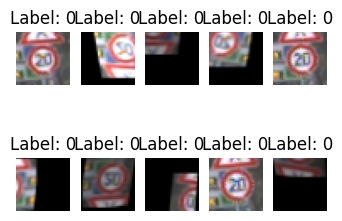

In [28]:
#1...validation of resizing of images

# Check sizes of data and labels
print("Data shape:", rf_data.shape)
print("Labels shape:", rf_label.shape)

# Visualize a few images along with their labels
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(4,3))
for i, ax in enumerate(axes.flat):
    ax.imshow(rf_data[i])
    ax.set_title(f"Label: {rf_label[i]}")
    ax.axis('off')

plt.show()

In [29]:
#train test split of images

from keras.utils import to_categorical
print("\n",rf_data.shape, rf_label.shape)
X_train, X_test, y_train, y_test = train_test_split(rf_data, rf_label, test_size=0.2, random_state=42)
print("\n",X_train.shape,"and" ,X_test.shape,"and", y_train.shape,"and" ,y_test.shape)


 (30100, 32, 32, 3) (30100,)

 (24080, 32, 32, 3) and (6020, 32, 32, 3) and (24080,) and (6020,)


**Random Forest**

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

# Flatten the images or use appropriate representation
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train_flatten, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Use the best model for prediction
best_random_forest_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_random_forest = best_random_forest_model.predict(X_test_flatten)

print(y_test.shape,y_pred_random_forest.shape)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best hyperparameters: {'max_depth': None, 'n_estimators': 100}
(6020,) (6020,)


In [35]:
# Calculate accuracy
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy of Random Forest model:", accuracy_random_forest)

rf_precision = precision_score(y_test,y_pred_random_forest, average='weighted')
print("Precision of Random Forest model:", rf_precision)

rf_recall = recall_score(y_test,y_pred_random_forest,average='weighted')
print("Recall of Random Forest model:", rf_recall)

rf_f1 = recall_score(y_test,y_pred_random_forest,average='weighted')
print("F1 Score of Random Forest model:", rf_f1)

Accuracy of Random Forest model: 0.7915282392026578
Precision of Random Forest model: 0.8148101273470016
Recall of Random Forest model: 0.7915282392026578
F1 Score of Random Forest model: 0.7915282392026578


**Logistic Regression Model**

In [9]:
# Make copies of Glodata and Glolabels
log_data = np.copy(Glodata)  # Copy the array of resized images
log_label = np.copy(Glolabels)  # Copy the array of corresponding labels

In [10]:
#train test split of images

from keras.utils import to_categorical
print("\n",log_data.shape, log_label.shape)
X_train, X_test, y_train, y_test = train_test_split(log_data, log_label, test_size=0.2, random_state=42)
print("\n",X_train.shape,"and" ,X_test.shape,"and", y_train.shape,"and" ,y_test.shape)


 (30100, 32, 32, 3) (30100,)

 (24080, 32, 32, 3) and (6020, 32, 32, 3) and (24080,) and (6020,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

# Initialize and train the logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = log_reg_model.predict(X_test_scaled)


c:\Users\patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression model on test data from Test.csv:", accuracy_lr)

# Calculate precision
lg_precision = precision_score(y_test,y_pred_lr, average='weighted')
print("Precision of logistic regression model:", lg_precision)

# Calculate recall
lg_recall = recall_score(y_test, y_pred_lr, average='weighted')
print("Recall of logistic regression model:", lg_recall)

# Calculate F1-score
lg_f1 = f1_score(y_test, y_pred_lr, average='weighted')
print("F1-score of logistic regression model:", lg_f1)

Accuracy of Logistic Regression model on test data from Test.csv: 0.6820598006644518
Precision of logistic regression model: 0.683623712372494
Recall of logistic regression model: 0.6820598006644518
F1-score of logistic regression model: 0.6805604215779147


**VGG16 Model**

In [14]:
# Make copies of Glodata and Glolabels
vgg_data = np.copy(Glodata)  # Copy the array of resized images
vgg_label = np.copy(Glolabels)  # Copy the array of corresponding labels

In [15]:
#train test split of images

from keras.utils import to_categorical
print("\n",vgg_data.shape, vgg_label.shape)
X_train, X_test, y_train, y_test = train_test_split(vgg_data, vgg_label, test_size=0.2, random_state=42)
print("\n",X_train.shape,"and" ,X_test.shape,"and", y_train.shape,"and" ,y_test.shape)


 (30100, 32, 32, 3) (30100,)

 (24080, 32, 32, 3) and (6020, 32, 32, 3) and (24080,) and (6020,)


In [16]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print("\n",y_train," ",y_test)


 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import VGG16

# Load the pre-trained VGG16 model without the fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

# Freeze the layers in the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Create a Sequential model
VGGModel = Sequential()

# Add the pre-trained VGG16 model
VGGModel.add(base_model)

# Add new fully connected layers
VGGModel.add(Flatten())
VGGModel.add(Dense(256, activation='relu'))
VGGModel.add(Dropout(rate=0.5))
VGGModel.add(Dense(43, activation='softmax'))

# Compilation of the model
VGGModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
VGGModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
# Number of epochs for training
epochs = 10

# Train the model
vgg = VGGModel.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 255s 331ms/step - accuracy: 0.1884 - loss: 7.9352 - val_accuracy: 0.4852 - val_loss: 1.7555
Epoch 2/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 245s 326ms/step - accuracy: 0.4194 - loss: 2.0056 - val_accuracy: 0.5701 - val_loss: 1.3764
Epoch 3/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 241s 320ms/step - accuracy: 0.4997 - loss: 1.6335 - val_accuracy: 0.6166 - val_loss: 1.2218
Epoch 4/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 259s 344ms/step - accuracy: 0.5423 - loss: 1.4608 - val_accuracy: 0.6628 - val_loss: 1.1181
Epoch 5/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 259s 344ms/step - accuracy: 0.5742 - loss: 1.3394 - val_accuracy: 0.6784 - val_loss: 1.0442
Epoch 6/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 268s 355ms/step - accuracy: 0.6008 - loss: 1.2631 - val_accuracy: 0.6947 - val_loss: 0.9895
Epoch 7/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 256s 340ms/step - accuracy: 0.6174 - loss: 1.1972 - val_accuracy: 0.6957 - val_loss: 0.9818
Epoch 8/10
753/753 ━━━━━━━━━━━━━━━━━━━━ 249s 331ms/step - accuracy: 0.6286 -

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions using the trained VGG model
y_pred_vgg = VGGModel.predict(X_test)

# Convert predictions to one-hot encoded format
y_pred_vgg_classes = np.argmax(y_pred_vgg, axis=1)

# Convert test labels to one-hot encoded format
y_test_one_hot = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy_vgg = accuracy_score(y_test_one_hot, y_pred_vgg_classes)
print("Accuracy of VGG model:", accuracy_vgg)

# Calculate precision
precision_vgg = precision_score(y_test_one_hot, y_pred_vgg_classes, average='weighted')
print("Precision of VGG model:", precision_vgg)

# Calculate recall
recall_vgg = recall_score(y_test_one_hot, y_pred_vgg_classes, average='weighted')
print("Recall of VGG model:", recall_vgg)

# Calculate F1-score
f1_vgg = f1_score(y_test_one_hot, y_pred_vgg_classes, average='weighted')
print("F1-score of VGG model:", f1_vgg)


189/189 ━━━━━━━━━━━━━━━━━━━━ 51s 266ms/step
Accuracy of VGG model: 0.7207641196013289
Precision of VGG model: 0.7300165718941015
Recall of VGG model: 0.7207641196013289
F1-score of VGG model: 0.7215615065994718


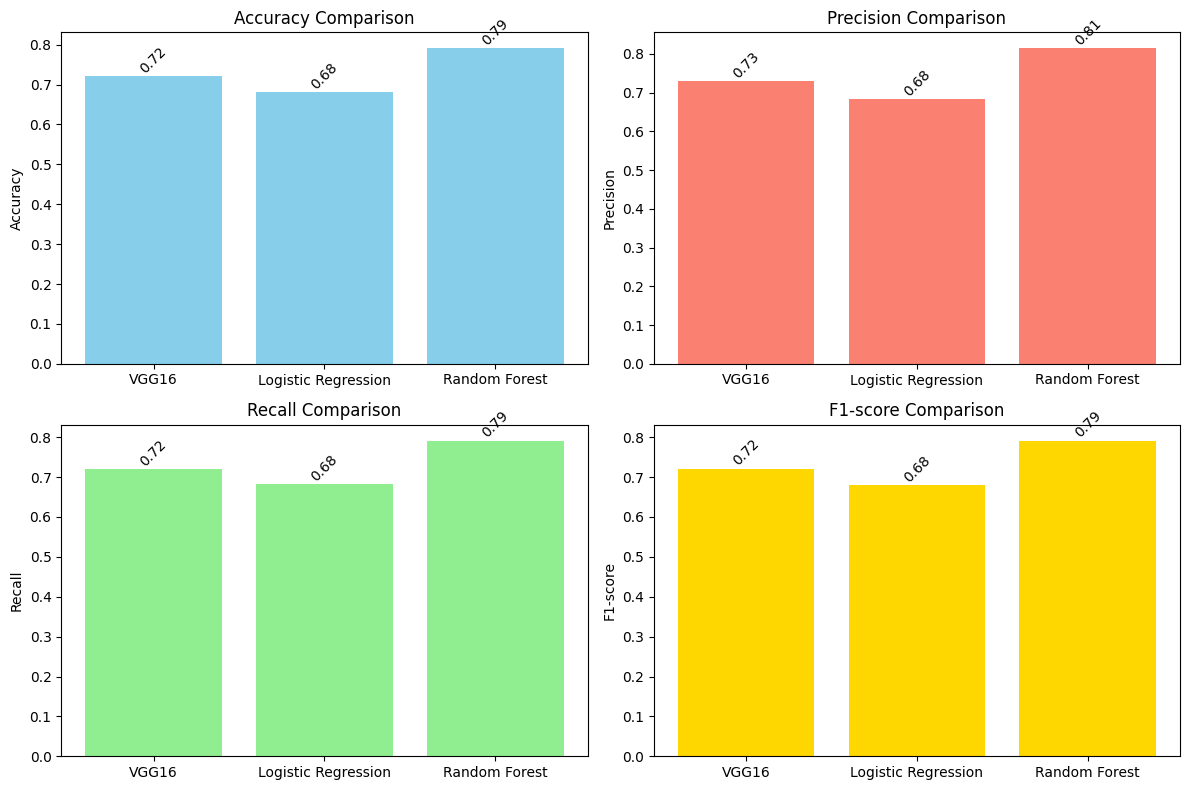

In [36]:
import matplotlib.pyplot as plt

# Define the metrics for each model
models = ['VGG16', 'Logistic Regression', 'Random Forest']
accuracy = [accuracy_vgg, accuracy_lr, accuracy_random_forest]
precision = [precision_vgg, lg_precision, rf_precision]
recall = [recall_vgg, lg_recall, rf_recall]
f1_score = [f1_vgg, lg_f1, rf_f1]

# Plot the comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy comparison
bars = axes[0, 0].bar(models, accuracy, color='skyblue')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')

# Precision comparison
bars = axes[0, 1].bar(models, precision, color='salmon')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')

# Recall comparison
bars = axes[1, 0].bar(models, recall, color='lightgreen')
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')

# F1-score comparison
bars = axes[1, 1].bar(models, f1_score, color='gold')
axes[1, 1].set_title('F1-score Comparison')
axes[1, 1].set_ylabel('F1-score')

# Add value labels to each bar
for ax in axes.flat:
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2),
                ha='center', va='bottom', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Testing Randomforest model**


In [38]:
from sklearn.metrics import accuracy_score
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the test data from Test.csv
test_data = pd.read_csv('Test.csv')
labels_test = test_data["ClassId"].values
img_paths = test_data["Path"].values

# Load and preprocess images
data_test = []
for img_path in img_paths:
    image = Image.open(img_path)
    image = image.resize((32, 32))
    data_test.append(np.array(image).flatten())  # Flatten the image
x_test_rf = np.array(data_test)

# Make predictions using the trained Random Forest model
y_pred_random_forest = best_random_forest_model.predict(x_test_rf)

In [39]:
#Calculate accuracy
accuracy_rf_test= accuracy_score(labels_test, y_pred_random_forest)
print("Accuracy of Random Forest model on test data from Test.csv:", accuracy_rf_test)


#Calculate precision
precision_rf_test = precision_score(labels_test, y_pred_random_forest, average='weighted')
print("Precision of Random Forest model on test data from Test.csv:", precision_rf_test)

#Calculate recall
recall_rf_test = recall_score(labels_test, y_pred_random_forest, average='weighted')
print("Recall of Random Forest model on test data from Test.csv:", recall_rf_test)

#Calculate F1-score
f1_rf_test = f1_score(labels_test, y_pred_random_forest, average='weighted')
print("F1-score of Random Forest model on test data from Test.csv:", f1_rf_test)

Accuracy of Random Forest model on test data from Test.csv: 0.661520190023753
Precision of Random Forest model on test data from Test.csv: 0.7297149237982251
Recall of Random Forest model on test data from Test.csv: 0.661520190023753
F1-score of Random Forest model on test data from Test.csv: 0.6746343729128034


### Comparison of Evaluation Matrices for Train and Test of Random Forest

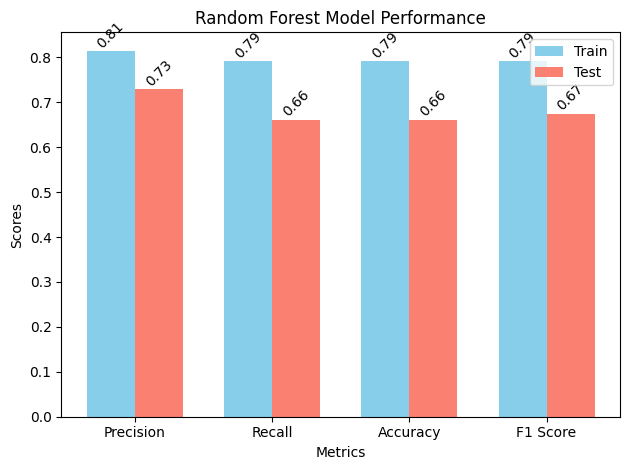

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
train_scores = [rf_precision, rf_recall, accuracy_random_forest, rf_f1]
test_scores = [precision_rf_test, recall_rf_test, accuracy_rf_test, f1_rf_test]

# Number of metrics
n_metrics = len(metrics)

# Bar width
bar_width = 0.35

# Index for x-axis
index = np.arange(n_metrics)

# Create subplots
fig, ax = plt.subplots()

# Plot train scores
train_bars = ax.bar(index - bar_width/2, train_scores, bar_width, label='Train', color='skyblue')
# Plot test scores
test_bars = ax.bar(index + bar_width/2, test_scores, bar_width, label='Test', color='salmon')

# Add value labels to each bar
for bar in train_bars + test_bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(bar.get_height(), 2),
            ha='center', va='bottom', rotation=45)

# Customize ticks and labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Random Forest Model Performance')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [42]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming best_random_forest_model is your trained RandomForestClassifier
with open('TSRBestModel.pkl', 'wb') as file:
    pickle.dump(best_random_forest_model, file)